#Introducción al aprendizaje profundo para la visión artificial


Creando una instancia de una pequeña convnet

In [1]:
pip install tensorflow  # Instala la librería TensorFlow en el entorno de Python


Note: you may need to restart the kernel to use updated packages.


In [2]:
from tensorflow import keras # Importa la API de Keras de TensorFlow
from tensorflow.keras import layers # Importa el módulo 'layers' de Keras
inputs = keras.Input(shape=(28, 28, 1))  # Define la capa de entrada, que espera imágenes de tamaño 28x28 con 1 canal (escala de grises)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs) # Capa convolucional 2D con 32 filtros, tamaño de kernel 3x3, y activación ReLU
x = layers.MaxPooling2D(pool_size=2)(x)  # Capa de MaxPooling 2D con un tamaño de pool de 2x2, que reduce la dimensionalidad espacial
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)# Capa convolucional 2D con 64 filtros, tamaño de kernel 3x3, y activación ReLU
x = layers.MaxPooling2D(pool_size=2)(x) # Capa de MaxPooling 2D
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x) # Capa convolucional 2D con 128 filtros, tamaño de kernel 3x3, y activación ReLU
x = layers.Flatten()(x)  # Aplana la salida de la capa anterior para que pueda ser pasada a capas densas
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Visualización del resumen del modelo

In [3]:
model.summary()#mostrar un resumen detallado

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

Entrenamiento de la convnet en imágenes MNIST

In [4]:
from tensorflow.keras.datasets import mnist # Cargar el conjunto de datos MNIST 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) # La nueva forma es (60000, 28, 28, 1), donde 1 es el canal para imágenes en escala de grises
train_images = train_images.astype("float32") / 255 # Convertir los datos de entrenamiento a flotantes y normalizarlos dividiendo entre 255
# Esto lleva los valores de cada pixel al rango [0, 1], lo cual ayuda a mejorar el entrenamiento
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255 # Convertir los datos de prueba a flotantes y normalizarlos

model.compile(optimizer="rmsprop", # Compilar el modelo con el optimizador 'rmsprop' y la función de pérdida
    loss="sparse_categorical_crossentropy",# 'sparse_categorical_crossentropy', que es adecuada para clasificación de múltiples clases
    metrics=["accuracy"])# También se establece 'accuracy' como métrica de rendimiento


# Entrenar el modelo con los datos de entrenamiento
# 'epochs=5' indica que el modelo verá todos los datos 5 veces
# 'batch_size=64' significa que el modelo procesará 64 imágenes a la vez
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8824 - loss: 0.3747
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9851 - loss: 0.0475
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9901 - loss: 0.0332
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9930 - loss: 0.0234
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9945 - loss: 0.0178


Evaluación de la convnet

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels) # Evalúa el modelo en el conjunto de datos de prueba y devuelve dos valore
print(f"Test accuracy: {test_acc:.3f}") # mostrar tres decimales para el valor de 'test_acc'.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9843 - loss: 0.0566
Test accuracy: 0.988


La operación de agrupamiento máximo

In [6]:
inputs = keras.Input(shape=(28, 28, 1)) # Define la entrada del modelo con una forma específica
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs) # Aplica una capa convolucional con 32 filtros y un tamaño de kernel de 3x3
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x) # Agrega una segunda capa convolucional con 64 filtros y el mismo tamaño de kernel de 3x3 
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)# Agrega una tercera capa convolucional, esta vez con 128 filtros.
x = layers.Flatten()(x) # Aplana (flatten) las salidas de la última capa convolucional para convertirlas en un vector
outputs = layers.Dense(10, activation="softmax")(x)# Crea la capa de salida, que es una capa densa con 10 neuronas
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs) # Define el modelo final que toma `inputs` como entrada y `outputs` como salida

In [7]:
model_no_max_pool.summary()#mostrar un resumen del modelo

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       619,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 712,202 (2.72 MB)

 Trainable params: 712,202 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs) # Capa de reescalado para normalizar los valores de los píxeles entre 0 y 1
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x) # Capa convolucional 2D con 32 filtros, cada uno con un tamaño de 3x3
x = layers.MaxPooling2D(pool_size=2)(x) # Capa de MaxPooling2D con un tamaño de ventana de 2x2
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) # Capa densa con una sola neurona de salida y activación sigmoide
model = keras.Model(inputs=inputs, outputs=outputs) # Definición del modelo con las capas de entrada y salida


In [10]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(loss="binary_crossentropy", # Compilación del modelo para entrenamiento
              optimizer="rmsprop",
              metrics=["accuracy"])

Entrenamiento de una convnet desde cero en un pequeño conjunto de datos


Copiar imágenes a directorios de entrenamiento, validación y prueba

In [11]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

#Construyendo el modelo

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

#Preprocesamiento de datos

In [15]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [16]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [17]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [18]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [19]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [20]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Visualización de las formas de los datos y las etiquetas generadas por el conjunto de datos

Ajuste del modelo utilizando un conjunto de datos

In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 57s 884ms/step - accuracy: 0.5348 - loss: 0.7522 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.5030 - val_loss: 0.6915
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.5577 - loss: 0.7013 - val_accuracy: 0.6160 - val_loss: 0.6636
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6005 - loss: 0.6689 - val_accuracy: 0.5470 - val_loss: 0.7019
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 999ms/step - accuracy: 0.6510 - loss: 0.6359 - val_accuracy: 0.6160 - val_loss: 0.6919
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.6697 - loss: 0.6188 - val_accuracy: 0.6820 - val_loss: 0.5804
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 57s 899ms/step - accuracy: 0.6987 - loss: 0.5754 - val_accuracy: 0.6910 - val_loss: 0.5670
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 756ms/step - accuracy: 0.7322 - loss: 0.5567 - val_accuracy: 0.6740

Visualización de curvas de pérdida y precisión durante el entrenamiento

In [23]:
pip install matplotlib


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------- ----------------------- 3.1/7.8 MB 15.3 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 16.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 16.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 17.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 18.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


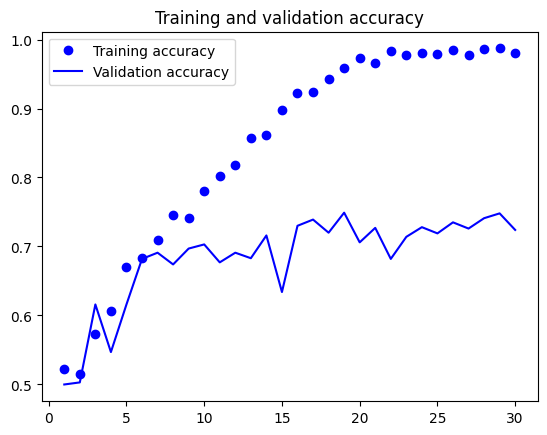

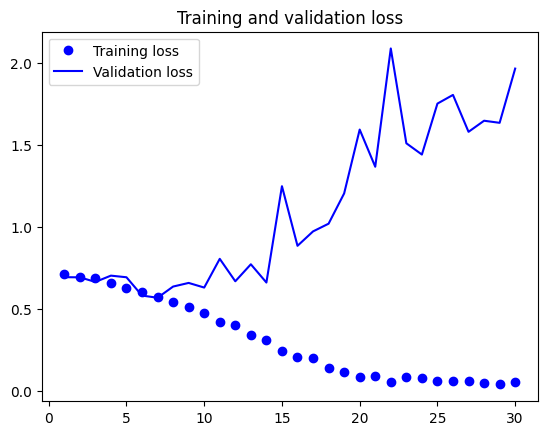

In [24]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Evaluación del modelo en el conjunto de prueba

In [25]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.6945 - loss: 0.5792
Test accuracy: 0.688


#Uso de la ampliación de datos

In [27]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

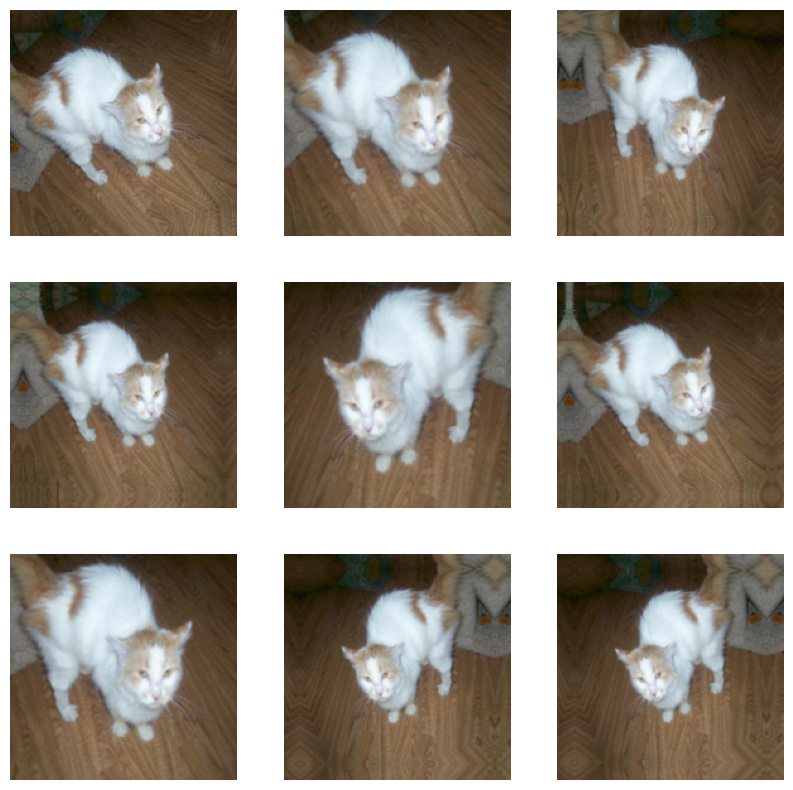

In [28]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [29]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [30]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 800ms/step - accuracy: 0.5144 - loss: 0.7284 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 752ms/step - accuracy: 0.5029 - loss: 0.6935 - val_accuracy: 0.5060 - val_loss: 0.6912
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 804ms/step - accuracy: 0.5328 - loss: 0.6932 - val_accuracy: 0.5970 - val_loss: 0.6724
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 756ms/step - accuracy: 0.5816 - loss: 0.6793 - val_accuracy: 0.5920 - val_loss: 0.6595
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 763ms/step - accuracy: 0.6018 - loss: 0.6635 - val_accuracy: 0.6170 - val_loss: 0.6519
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 28777s 464s/step - accuracy: 0.6452 - loss: 0.6482 - val_accuracy: 0.6230 - val_loss: 0.6567
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 983ms/step - accuracy: 0.6388 - loss: 0.6356 - val_accuracy: 0.6370 - val_loss: 0.6388
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 981ms/step - accuracy: 0.6738 - loss: 0.6155 

In [31]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.8414 - loss: 0.4388
Test accuracy: 0.840


#Aprovechar un modelo entrenado previamente

In [32]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [33]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [35]:
train_features.shape

(2000, 5, 5, 512)

In [36]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8870 - loss: 16.5146 - val_accuracy: 0.9650 - val_loss: 5.6806
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9775 - loss: 3.7961 - val_accuracy: 0.8620 - val_loss: 43.2831
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9809 - loss: 3.2083 - val_accuracy: 0.9610 - val_loss: 7.6526
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9779 - loss: 3.9741 - val_accuracy: 0.9770 - val_loss: 3.8598
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9958 - loss: 0.3402 - val_accuracy: 0.9700 - val_loss: 7.3113
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9943 - loss: 1.1868 - val_accuracy: 0.9770 - val_loss: 5.3998
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9972 - loss: 0.0846 - val_accuracy: 0.9730 - val_loss: 6.8572
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9912 - loss: 0.9060 - val_accuracy: 0.9750 -

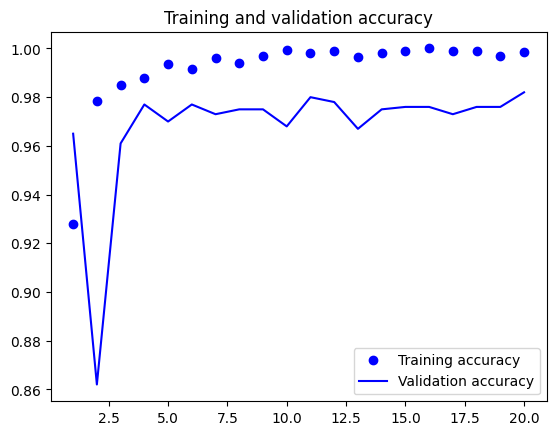

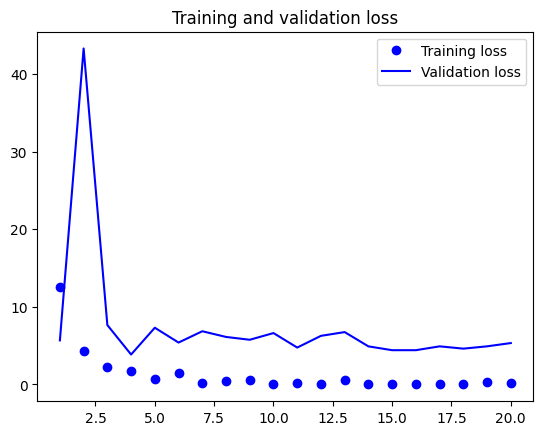

In [37]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [39]:
# Cargar la base de una red neuronal preentrenada (VGG16)
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",  # Usar los pesos preentrenados de "imagenet"
    include_top=False) # Incluir solo las capas convolucionales
conv_base.trainable = False # Congelar las capas de la base convolucional

In [40]:
conv_base.trainable = True # Descongelar las capas de la base convolucional
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights)) # Imprimir la cantidad de pesos entrenables en el modelo antes de congelar

This is the number of trainable weights before freezing the conv base: 26


In [41]:
conv_base.trainable = False # Congelar las capas de la base convolucional
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights)) # Imprimir la cantidad de pesos entrenables en el modelo después de congelar

This is the number of trainable weights after freezing the conv base: 0


In [42]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [43]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.8205 - loss: 50.5018 - val_accuracy: 0.9760 - val_loss: 3.0514
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.9404 - loss: 6.4887 - val_accuracy: 0.9630 - val_loss: 4.3051
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.9524 - loss: 6.5023 - val_accuracy: 0.9740 - val_loss: 3.0015
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9445 - loss: 9.4673 - val_accuracy: 0.9700 - val_loss: 3.5059
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.9610 - loss: 5.0115 - val_accuracy: 0.9660 - val_loss: 4.8256
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.9711 - loss: 3.0915 - val_accuracy: 0.9800 - val_loss: 2.3965
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 222s 4s/step - accuracy: 0.9758 - loss: 2.5303 - val_accuracy: 0.9810 - val_loss: 3.3083
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 380s 6s/step - accuracy: 0.9741 - loss: 2.5701 - val_accuracy: 0.9760 - 

In [45]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9795 - loss: 1.3764
Test accuracy: 0.975


In [46]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [47]:
conv_base.trainable = True #descongela las capas
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [48]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2379s 38s/step - accuracy: 0.9891 - loss: 0.5194 - val_accuracy: 0.9800 - val_loss: 1.9878
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 336s 5s/step - accuracy: 0.9946 - loss: 0.0905 - val_accuracy: 0.9840 - val_loss: 1.6155
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 332s 5s/step - accuracy: 0.9950 - loss: 0.1603 - val_accuracy: 0.9810 - val_loss: 1.9618
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 329s 5s/step - accuracy: 0.9911 - loss: 0.5627 - val_accuracy: 0.9800 - val_loss: 2.0869
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 332s 5s/step - accuracy: 0.9950 - loss: 0.2995 - val_accuracy: 0.9810 - val_loss: 1.8457
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 476s 8s/step - accuracy: 0.9931 - loss: 0.3707 - val_accuracy: 0.9770 - val_loss: 2.2745
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 333s 5s/step - accuracy: 0.9967 - loss: 0.0921 - val_accuracy: 0.9810 - val_loss: 1.5470
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 308s 5s/step - accuracy: 0.9927 - loss: 0.2921 - val_accuracy: 0.9800 -

In [49]:
model = keras.models.load_model("fine_tuning.keras") # Cargar un modelo previamente guardado en un archivo
test_loss, test_acc = model.evaluate(test_dataset) # Evaluar el modelo cargado usando el dataset de prueba
print(f"Test accuracy: {test_acc:.3f}") # Imprimir la precisión del modelo en el conjunto de prueba con 3 decimales

63/63 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.9827 - loss: 0.9779
Test accuracy: 0.975
